# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import for readability of data coming back from the API retrieval
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

######## REMEMBER TO CHANGE THE SIZE BACK TO 1500 for the full run #######################################################
# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=15)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=15)
lat_lngs = zip(lats, lngs)
 
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



14

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
 print(cities)

['toliary', 'rikitea', 'port macquarie', 'illoqqortoormiut', 'slave lake', 'atuona', 'gander', 'barrow', 'east london', 'puerto ayora', 'coos bay', 'bulgan', 'luganville', 'jamestown']


In [4]:
# Set up the static url information
base_url = "http://api.openweathermap.org/data/2.5/weather?"

temperature_unit = "Imperial"

# Initialize the lists for use in holding associated data.
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

# Initialize an integer to count the records
record_counter = 1

print(f"Beginning Data Retrieval")

# Loop through the cities and pull the requested  weather information from the openweathermap

for city in cities:
   
    query_url = base_url + "&appid=" + weather_api_key + "&q=" + city + "&units=" + temperature_unit
    response = requests.get(query_url).json()

    try:
      
      # Print out the city being worked with 
      print(f"Processing Record {record_counter} of Set 1 | {city}")  
            
      cloudiness.append(response["clouds"]["all"])
      country.append(response["sys"]["country"])
      date.append(response["dt"])
      max_temp.append(response["main"]["temp_max"])
      humidity.append(response["main"]["humidity"])
      lat.append(response["coord"]["lat"])
      lng.append(response["coord"]["lon"])
      wind_speed.append(response["wind"]["speed"])
      city_name.append(response["name"])
        
      # Increment the record counter     
      record_counter += 1
            
    except:    
      print(f"   Unable to locate City:  {city}")
      record_counter += 1
            
print(f"-----------------------------")
print(f" Data Retrieval Complete")  
print(f"-----------------------------")            

Beginning Data Retrieval
Processing Record 1 of Set 1 | toliary
   Unable to locate City:  toliary
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | port macquarie
Processing Record 4 of Set 1 | illoqqortoormiut
   Unable to locate City:  illoqqortoormiut
Processing Record 5 of Set 1 | slave lake
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | gander
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | coos bay
Processing Record 12 of Set 1 | bulgan
Processing Record 13 of Set 1 | luganville
Processing Record 14 of Set 1 | jamestown
-----------------------------
 Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create dataframe to prepare the order the data will be written to the output file apicityweather.csv
api_city_weather_df = pd.DataFrame({"City": city_name,
                                    "Lat": lat,
                                    "Lng": lng,
                                    "Max Temp": max_temp,
                                    "Humidity": humidity,
                                    "Cloudiness": cloudiness,
                                    "Wind Speed": wind_speed,
                                    "Country": country,
                                    "Date": date
             })  


In [7]:
# Export the City weather data into a .csv file

api_city_weather_df.to_csv("Output/apicityweather.csv",
                  encoding="utf-8", index=False, header=True)

In [16]:
# Print the dataframe which represents the data written to the apicityweather.csv file
api_city_weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,39.20,65,20,12.66,US,1615340404
1,Hithadhoo,-0.6000,73.0833,83.64,64,94,5.08,MV,1615340558
2,Mahébourg,-20.4081,57.7000,75.20,88,20,1.14,MU,1615340561
3,Puerto Ayora,-0.7393,-90.3518,81.00,89,100,1.95,EC,1615340561
4,Salina,38.8403,-97.6114,66.99,59,1,18.41,US,1615340339


In [17]:
api_city_weather_df.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01
mean,15.365750,-19.937742,52.695833,77.250000,64.250000,9.731667,1.615341e+09
std,42.394096,98.574349,30.573906,11.498024,36.244435,8.599518,8.929980e+01
min,-54.800000,-159.319000,-4.000000,59.000000,1.000000,1.010000,1.615340e+09
25%,-11.796975,-78.062600,37.400000,64.750000,35.000000,3.067500,1.615341e+09
50%,10.737600,-68.445700,63.005000,82.000000,84.500000,6.825000,1.615341e+09
75%,48.461300,61.545825,73.850000,87.250000,91.000000,16.400000,1.615341e+09
max,70.469200,153.683300,83.640000,89.000000,100.000000,27.630000,1.615341e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
#  Get the indices of cities that have humidity over 100%.

#      At this time, there does not appear to be any cities having humidity > 100%
#      As per the instructions, skipping this step

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#     At this time, there does not appear to be any cities having humidity > 100%
#     As per the instructions, skipping this step


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

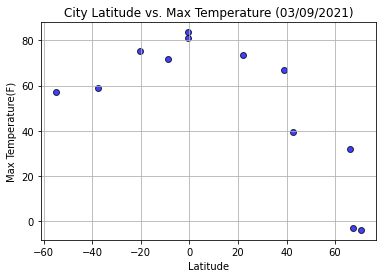

In [78]:
plt.scatter(api_city_weather_df["Lat"], api_city_weather_df["Max Temp"], 
            marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

plt.grid()
plt.title("City Latitude vs. Max Temperature (03/09/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.savefig("Images/LatitudeVSTemperature.png")
plt.show()



## Latitude vs. Humidity Plot

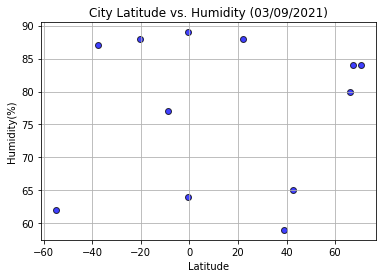

In [79]:
plt.scatter(api_city_weather_df["Lat"], api_city_weather_df["Humidity"],
            marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

plt.title("City Latitude vs. Humidity (03/09/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

plt.savefig("Images/LatitudeVSHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

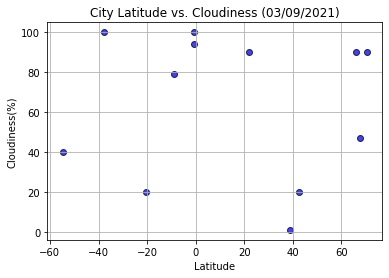

In [80]:
plt.scatter(api_city_weather_df["Lat"], api_city_weather_df["Cloudiness"],
            marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

plt.title("City Latitude vs. Cloudiness (03/09/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

plt.savefig("Images/LatitudeVSCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

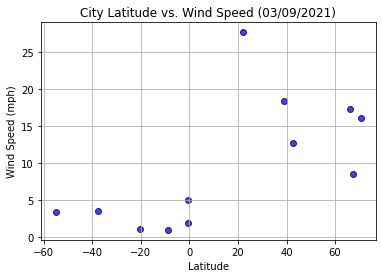

In [81]:
plt.scatter(api_city_weather_df["Lat"], api_city_weather_df["Wind Speed"],
            marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

plt.title("City Latitude vs. Wind Speed (03/09/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("Images/LatitudeVSWindSpeed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


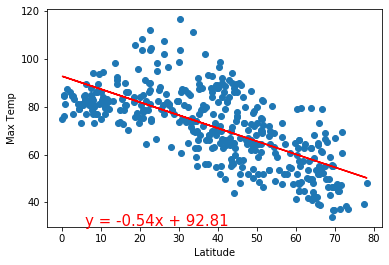

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


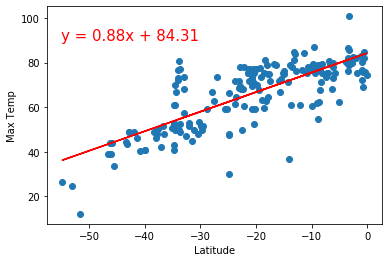

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


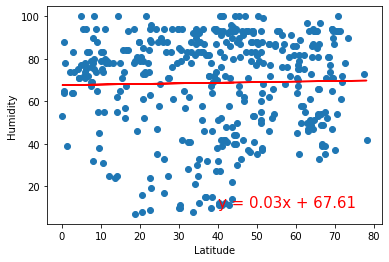

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


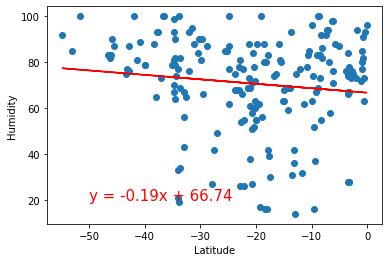

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


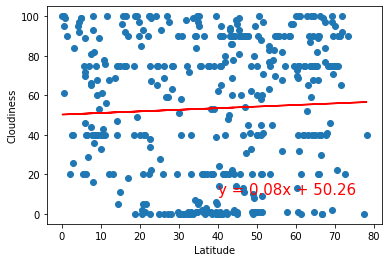

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


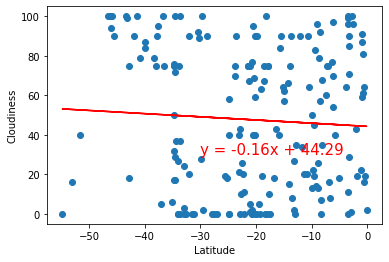

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


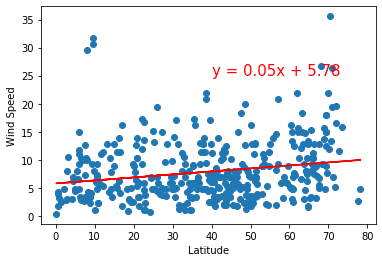

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


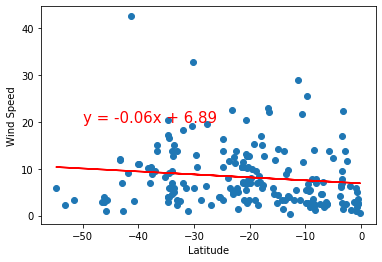